Troy Morgan  
Week 10 Instructor-Led Lab  
BGEN 632, Graduate Introduction to Python  
Submitted April 29, 2025.    

Instructor-led Lab: Data Reduction

# Setup

In [35]:
# Import modules

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca

# for factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls
# See reference
from sklearn.preprocessing import LabelEncoder

# for decision tree 
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree

# modules for plotting trees
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

In [5]:
# set working directory and confirm change
os.chdir("\\Users\\troy.morgan\\Documents\\GitHub\\week10labs/data")  # change this to your filepath
os.getcwd()  

'C:\\Users\\troy.morgan\\Documents\\GitHub\\week10labs\\data'

In [6]:
# Load data and inspect
Cali_Hospital_df = pd.read_table('calihospital.txt')
Cali_Hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   Website        61 non-null     object 
 4   TypeControl    61 non-null     object 
 5   Teaching       61 non-null     object 
 6   DonorType      61 non-null     object 
 7   NoFTE          61 non-null     float64
 8   NetPatRev      61 non-null     float64
 9   InOperExp      61 non-null     float64
 10  OutOperExp     61 non-null     float64
 11  OperRev        61 non-null     int64  
 12  OperInc        61 non-null     int64  
 13  AvlBeds        61 non-null     int64  
 14  Work_ID        61 non-null     int64  
 15  LastName       61 non-null     object 
 16  FirstName      61 non-null     object 
 17  Gender         61 non-null     object 
 18  PositionID  

In [9]:
#Remove columns I won't need for this assignment. 
Cali_Hospital_df_2 = Cali_Hospital_df.drop(Cali_Hospital_df.columns[[0, 1, 2, 3, 14, 15, 16, 17, 18, 19, 20, 21, 22]], axis = 1)

Cali_Hospital_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TypeControl  61 non-null     object 
 1   Teaching     61 non-null     object 
 2   DonorType    61 non-null     object 
 3   NoFTE        61 non-null     float64
 4   NetPatRev    61 non-null     float64
 5   InOperExp    61 non-null     float64
 6   OutOperExp   61 non-null     float64
 7   OperRev      61 non-null     int64  
 8   OperInc      61 non-null     int64  
 9   AvlBeds      61 non-null     int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 4.9+ KB


# Principal Component Analysis (PCA) in Python

In [10]:
# Create new df of numerical columns and inspect
Cali_Hospital_numerical_df = Cali_Hospital_df_2[['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', "AvlBeds"]]
Cali_Hospital_numerical_df.head()

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
0,327.0,135520.2186,20523425.53,34916220.47,49933713,-5505933,15
1,345.0,136156.6913,33447542.78,20348596.22,53351748,-444391,99
2,601.2,197094.2541,37254178.67,37832448.33,72933707,-2152920,107
3,400.0,139170.3798,23385570.10,24661355.90,51087341,3040415,55
4,262.0,116797.8306,13684502.49,15159986.51,42845642,14001153,42


In [11]:
# Conduct PCA
Cali_Hospital_pca_result = pca(n_components=7).fit(Cali_Hospital_numerical_df)

In [12]:
# Obtain eigenvalues
Cali_Hospital_pca_result.explained_variance_

array([2.75753261e+17, 6.75028311e+15, 2.04591348e+15, 2.44102791e+09,
       3.37008097e+05, 6.33647054e+03, 4.13822759e-05])

## Based on the eigenvalues, explain how many variables you should keep. Justify your reasoning.

Per the eigenvalues, 6 variables should be kept. This is becuase the eigenvalues are all greater than 1. 

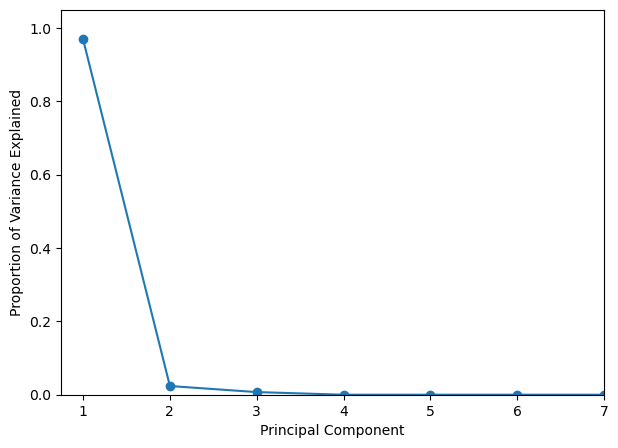

In [13]:
# Create and display a scree plot for the same set of data.

# generate scree plot - focus on the output
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7], Cali_Hospital_pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
plt.xlim(0.75,4.25) 
plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7])

plt.show()

## Based on the scree plot, how many variables should you keep? Why?

According to this scree plot, only one variable should be kept. This is becuase the curve seems to flatten with component 2. However, I have a sneaking suspicion that 2 should also be included. Should this data have been scaled? The NoFTA and AvlBeds definitely seem to be on a different scale. So, why not try this again, only following your instructions for scaling. You know, for fun!

In [14]:
# scale data using standardization
scaler = preprocessing.StandardScaler()
Cali_Hospital_scaled_df = scaler.fit_transform(Cali_Hospital_numerical_df)

# run PCA with scaled data
CH_scaled_pca_result = pca(n_components=7).fit(Cali_Hospital_scaled_df)

In [15]:
# Obtain eigenvalues from the scaled data
CH_scaled_pca_result.explained_variance_

array([5.72134563e+00, 1.07657967e+00, 1.91383827e-01, 9.31699632e-02,
       3.29143500e-02, 1.27322677e-03, 5.91421134e-22])

## Based on the eigenvalues of the scaled data, explain how many variables you should keep. Justify your reasoning.

Done like this, two variables should be kept as only two have eigenvalues greater than 1. 

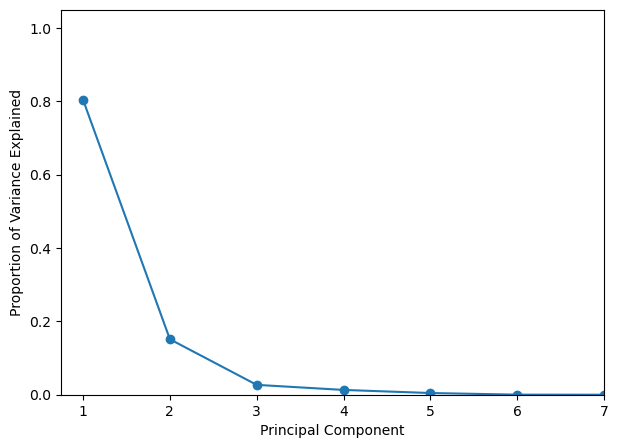

In [16]:
# generate scree plot of the scaled data 
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7], CH_scaled_pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
plt.xlim(0.75,4.25) 
plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7])

plt.show()

## Based on the scree plot of the scaled data, how many variables should you keep? Why?

Well, that looks a bit different. Using the scaled data it looks like we should keep two variables and this curve flattens out starting with component 3.  

I hope I did this correctly. Either way: neat!

# Clustering in Python

## Conduct a k-means cluster analysis for the numerical data. Choose a value of k and run your analysis.

In [17]:
Cali_Hospital_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TypeControl  61 non-null     object 
 1   Teaching     61 non-null     object 
 2   DonorType    61 non-null     object 
 3   NoFTE        61 non-null     float64
 4   NetPatRev    61 non-null     float64
 5   InOperExp    61 non-null     float64
 6   OutOperExp   61 non-null     float64
 7   OperRev      61 non-null     int64  
 8   OperInc      61 non-null     int64  
 9   AvlBeds      61 non-null     int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 4.9+ KB


In [19]:
# convert to categorical datatype
Cali_Hospital_df_2['Teaching'] = Cali_Hospital_df_2['Teaching'].astype('category')
Cali_Hospital_df_2['TypeControl'] = Cali_Hospital_df_2['TypeControl'].astype('category')
Cali_Hospital_df_2['DonorType'] = Cali_Hospital_df_2['DonorType'].astype('category')
Cali_Hospital_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   TypeControl  61 non-null     category
 1   Teaching     61 non-null     category
 2   DonorType    61 non-null     category
 3   NoFTE        61 non-null     float64 
 4   NetPatRev    61 non-null     float64 
 5   InOperExp    61 non-null     float64 
 6   OutOperExp   61 non-null     float64 
 7   OperRev      61 non-null     int64   
 8   OperInc      61 non-null     int64   
 9   AvlBeds      61 non-null     int64   
dtypes: category(3), float64(4), int64(3)
memory usage: 4.1 KB


In [45]:
# Run Kmeans analysis on numerical data using 3 clusters 
km_3 = cls.KMeans(n_clusters=3).fit(Cali_Hospital_df_2.loc[:, ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']])

# assigned clusters
km_3.labels_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1])

## Justify your choice of k.

I tried a bunch of k numbers, and 3 seems to provide the best grouping. I then retried 4, and the grouping for 3 seemed to be better. Also, no 4's appears at all, so... 3?! Yeah, 3. 3 is the magic number, right? 

## Create a confusion matrix for each of the three categorical variables (e.g., `Teaching`, `TypeControl`, `DonorType`). 

In [50]:
# So, I kept getting errors here when trying to create the confusion matrix. The error was "ValueError: Mix of label input types (string and number)." 
#This confused the crap out of me becuase you did it in the tutorial with a mix of catagorical and numerical data in kmeans_df. So, I asked ChatGPT.
#It suggested I do this so that the input types aren't mixed. I hope this wasn't dumb. Either way, I get to learn something! (Eventually...)

# Encode TypeControl to numeric labels
le_teaching = LabelEncoder()
le_typecontrol = LabelEncoder()
le_donortype = LabelEncoder()

# Encode columns in-place or to new columns
Cali_Hospital_df_2['Teaching'] = le_teaching.fit_transform(Cali_Hospital_df_2['Teaching'])
Cali_Hospital_df_2['TypeControl'] = le_typecontrol.fit_transform(Cali_Hospital_df_2['TypeControl'])
Cali_Hospital_df_2['DonorType'] = le_donortype.fit_transform(Cali_Hospital_df_2['DonorType'])

### Teaching

In [51]:
# confusion matrix - numerical representation
cm_Teaching = metcs.confusion_matrix(Cali_Hospital_df_2.Teaching, km_3.labels_)
cm_Teaching

array([[44,  0,  0],
       [ 3,  3, 11],
       [ 0,  0,  0]], dtype=int64)

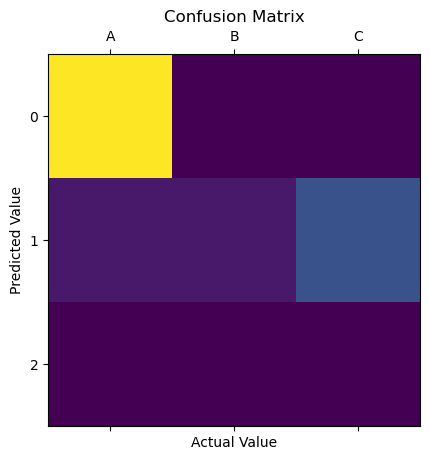

In [52]:
# confusion matrix - graphical representation
plt.matshow(cm_Teaching)
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xticks([0,1,2], ['A','B','C'])

plt.show()

### TypeControl

In [53]:
# confusion matrix - numerical representation
cm_TypeControl = metcs.confusion_matrix(Cali_Hospital_df_2.TypeControl, km_3.labels_)
cm_TypeControl

array([[ 3,  0,  4,  0],
       [14,  0,  0,  0],
       [ 3,  0,  0,  0],
       [27,  3,  7,  0]], dtype=int64)

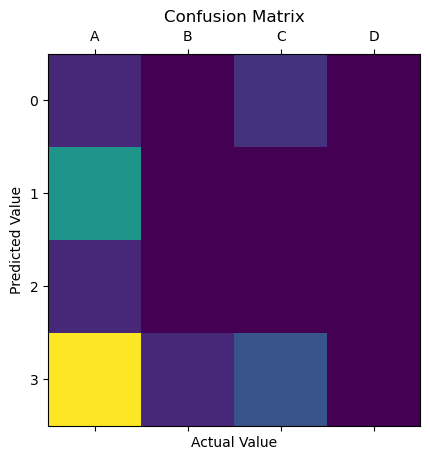

In [55]:
# confusion matrix - graphical representation
plt.matshow(cm_TypeControl)
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xticks([0,1,2, 3], ['A','B','C', 'D'])

plt.show()

### DonorType

In [56]:
# confusion matrix - numerical representation
cm_DonorType = metcs.confusion_matrix(Cali_Hospital_df_2.DonorType, km_3.labels_)
cm_DonorType

array([[ 3,  3, 11],
       [44,  0,  0],
       [ 0,  0,  0]], dtype=int64)

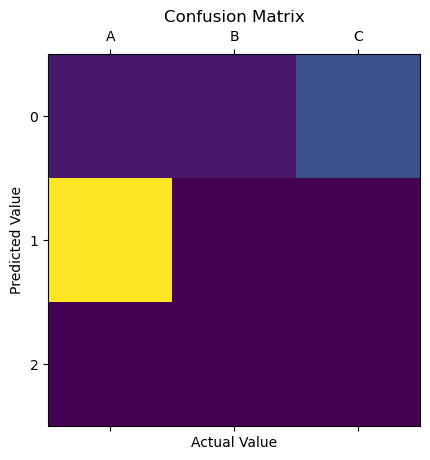

In [57]:
# confusion matrix - graphical representation
plt.matshow(cm_DonorType)
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xticks([0,1,2], ['A','B','C'])

plt.show()

## Determine which of the three variables is the best grouping variable. Why do you think it is the best fitting?

I... don't have any idea. I am going to go with my gut and say TypeControl? I am so lost. But, I made the functions work, so that's something, right?

# References

This ChatGPT exchange was used to help figure out the error I was getting with the confusion matrix.  

<div><center><img src = "assets/confustion_matrix_error.png"></center></div>  
